<a href="https://colab.research.google.com/github/sis00211/4dong4dong/blob/main/In_House_LED_M%26V.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib
import sklearn
from sklearn import metrics
from sklearn.neighbors import KNeighborsRegressor

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

from scipy.cluster.vq import kmeans, vq, whiten
from scipy.spatial.distance import cdist
import numpy as np
from datetime import datetime
import ipywidgets as widgets
from IPython.display import display

In [21]:
from google.colab import drive
drive.mount('/content/gdrive')
os.chdir("/content/gdrive/My Drive/EC3_Data")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [22]:
df = pd.read_csv('EC3_Clean.csv', index_col = "timestamp", parse_dates=True)
df.head(3)

,FacilityName,Year,Month,FY,Avg. OAT,Precipitation (in),HDD,CDD,Electricity Cost ($),Electricity Demand (KW),Electricity Usage (KWH),Gas (Therms),Gas Cost ($),Steam (mlbs),Steam Cost ($),Total Cost ($),Total Usage (mmBTUs)
timestamp,,,,,,,,,,,,,,,,,
2023-06-01,115th Street Branch Library,2023,6,2023,NaN,NaN,NaN,NaN,3254.15,57.6,13840.0,0.0,39.32,NaN,NaN,3293.47,47.24
2023-05-01,115th Street Branch Library,2023,5,2023,NaN,NaN,NaN,NaN,2757.40,54.4,9040.0,0.0,34.58,NaN,NaN,2791.98,30.85
2023-04-01,115th Street Branch Library,2023,4,2023,NaN,NaN,NaN,NaN,4787.10,94.4,18240.0,0.0,35.76,NaN,NaN,4822.86,62.25


In [23]:
unique_categories = df['FacilityName'].unique()

In [24]:
def on_dropdown_change(change):
    global selected_category
    selected_category = dropdown.value
    update_filtered_df()

def update_filtered_df():
    global filtered_df
    filtered_df = df[df['FacilityName'] == selected_category]
    print("Selected Category:", selected_category)
    print(filtered_df.info())

In [25]:
dropdown = widgets.Dropdown(options=unique_categories, description="Select a category:")
dropdown.observe(on_dropdown_change, names='value')

In [382]:
display(dropdown)

Dropdown(description='Select a category:', index=36, options=('115th Street Branch Library', '125th Street Bra…

In [383]:
#def on_dropdown_change(change):
 #   selected_category = dropdown.value
  #  filtered_df = df[df['FacilityName'] == selected_category]
   # print("Selected Category:", selected_category)
    #print(filtered_df)

In [384]:
Condition_categories = ['Avg. OAT','Precipitation (in)','HDD','CDD']
print(Condition_categories)

['Avg. OAT', 'Precipitation (in)', 'HDD', 'CDD']


In [385]:
def on_dropdown2_change(change):
    global Con_selected_category
    Con_selected_category = dropdown2.value
    print("Selected Category:", Con_selected_category)

In [386]:
#   update_Cond_categories()
def update_Cond_categories():
    global Cond_categories
    Cond_categories = [Con_selected_category]
    print("Selected Category:", Con_selected_category)


In [387]:
dropdown2 = widgets.Dropdown(options=Condition_categories, description="Select a category:")
dropdown2.observe(on_dropdown2_change, names='value')

In [388]:
display(dropdown2)

Dropdown(description='Select a category:', options=('Avg. OAT', 'Precipitation (in)', 'HDD', 'CDD'), value='Av…

In [389]:
x = filtered_df[Con_selected_category]

Text(0, 0.5, 'Total Usage (mmBTUs)')

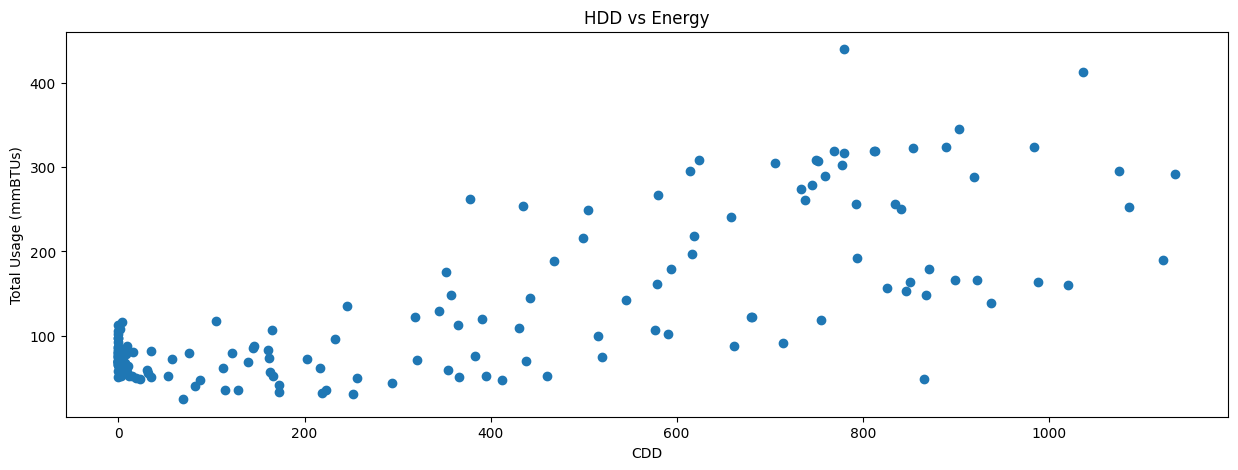

In [390]:
#x = filtered_df['CDD']
y = filtered_df['Total Usage (mmBTUs)']
plt.figure(figsize=(15,5))
plt.scatter(x,y)
plt.title (f"{Con_selected_category} vs Energy")
plt.xlabel("CDD")
plt.ylabel("Total Usage (mmBTUs)")

Text(0, 0.5, 'Gas (Therms)')

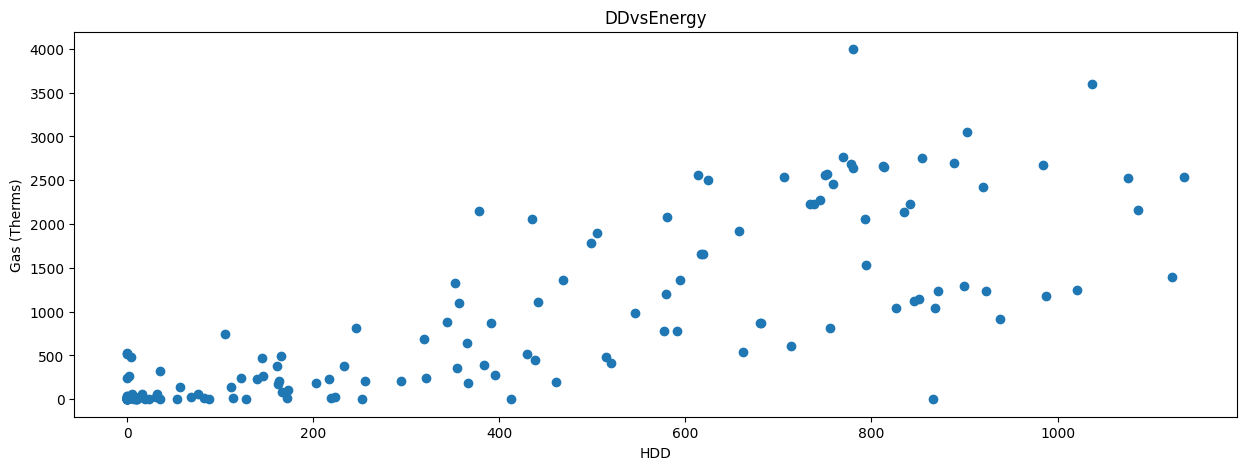

In [391]:
x = filtered_df['HDD']
y = filtered_df['Gas (Therms)']
plt.figure(figsize=(15,5))
plt.scatter(x,y)
plt.title ("DDvsEnergy")
plt.xlabel("HDD")
plt.ylabel("Gas (Therms)")

In [392]:
trainingFY = [2016,2017,2018,2019,2020,2021]
testFY = [2022]

In [393]:
#f_df = df[df['FacilityName'] == "Chatham Square Branch Library"]
f_df = filtered_df
trainingdata = f_df[f_df.index.year.isin(trainingFY)]
testdata= f_df[f_df.index.year.isin(testFY)]

In [394]:
f_df.head()
testdata.head(3)

,FacilityName,Year,Month,FY,Avg. OAT,Precipitation (in),HDD,CDD,Electricity Cost ($),Electricity Demand (KW),Electricity Usage (KWH),Gas (Therms),Gas Cost ($),Steam (mlbs),Steam Cost ($),Total Cost ($),Total Usage (mmBTUs)
timestamp,,,,,,,,,,,,,,,,,
2022-12-01,Hudson Park Branch Library,2022,12,2023,38.5,5.83,841.0,0.0,1674.21,17.2,8040.0,2227.0,3974.52,NaN,NaN,5648.73,250.14
2022-11-01,Hudson Park Branch Library,2022,11,2023,50.9,3.15,442.0,12.0,2675.03,45.2,9840.0,1114.0,2104.50,NaN,NaN,4779.53,144.98
2022-10-01,Hudson Park Branch Library,2022,10,2023,56.9,5.08,252.0,4.0,2303.19,31.6,9080.0,0.0,36.95,NaN,NaN,2340.14,30.99


In [395]:
x_train = trainingdata.drop(['Electricity Usage (KWH)','Steam (mlbs)','Steam Cost ($)','FacilityName','Year','Month','FY','Electricity Cost ($)','Electricity Demand (KW)'], axis=1)
y_train = trainingdata['Electricity Usage (KWH)']

In [396]:
x_test = testdata.drop(['Electricity Usage (KWH)','Steam (mlbs)','Steam Cost ($)','FacilityName','Year','Month','FY','Electricity Cost ($)','Electricity Demand (KW)'], axis=1)
y_test = testdata['Electricity Usage (KWH)']

In [397]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

In [398]:
x_train = x_train.fillna(0)
x_test = x_test.fillna(0)
y_train = y_train.fillna(0)
y_test = y_test.fillna(0)
x_train.head()

,Avg. OAT,Precipitation (in),HDD,CDD,Gas (Therms),Gas Cost ($),Total Cost ($),Total Usage (mmBTUs)
timestamp,,,,,,,,
2021-12-01,43.8,1.39,658.0,0.0,1923.0,3099.69,5307.21,240.90
2021-11-01,46.3,1.13,546.0,0.0,981.0,1544.01,4406.24,141.79
2021-10-01,62.0,5.26,112.0,37.0,138.0,303.77,3235.73,61.99
2021-09-01,70.3,10.03,7.0,192.0,6.0,42.11,3767.02,67.77
2021-08-01,77.6,10.32,0.0,406.0,5.0,39.40,3822.69,75.45


In [399]:
rf_model.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [400]:
y_pred = rf_model.predict(x_test)

In [401]:
predicted_vs_actual = pd.concat([y_test, pd.DataFrame(y_pred, index=y_test.index)], axis=1)

In [402]:
predicted_vs_actual.head()

,Electricity Usage (KWH),0
timestamp,,
2022-12-01,8040.0,14994.4
2022-11-01,9840.0,14868.0
2022-10-01,9080.0,15422.4
2022-09-01,15000.0,18006.4
2022-08-01,18760.0,19698.0


In [403]:
predicted_vs_actual.columns = ["Actual", "Predicted"]
predicted_vs_actual.head()

,Actual,Predicted
timestamp,,
2022-12-01,8040.0,14994.4
2022-11-01,9840.0,14868.0
2022-10-01,9080.0,15422.4
2022-09-01,15000.0,18006.4
2022-08-01,18760.0,19698.0


<Axes: xlabel='timestamp'>

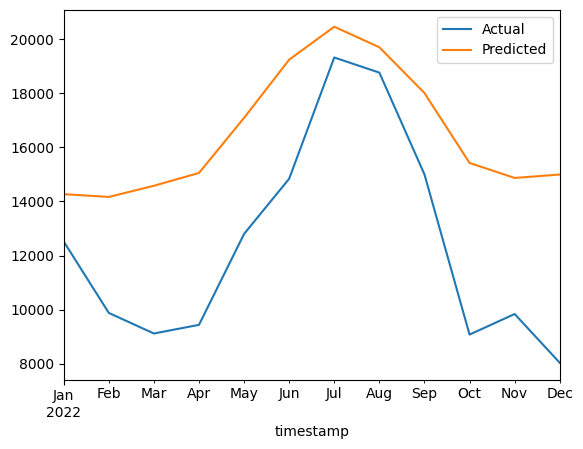

In [404]:
predicted_vs_actual.plot()

In [405]:
ytrain_table = pd.DataFrame(y_train)
ytrain_table.columns = ["Actual"]

<Axes: xlabel='timestamp'>

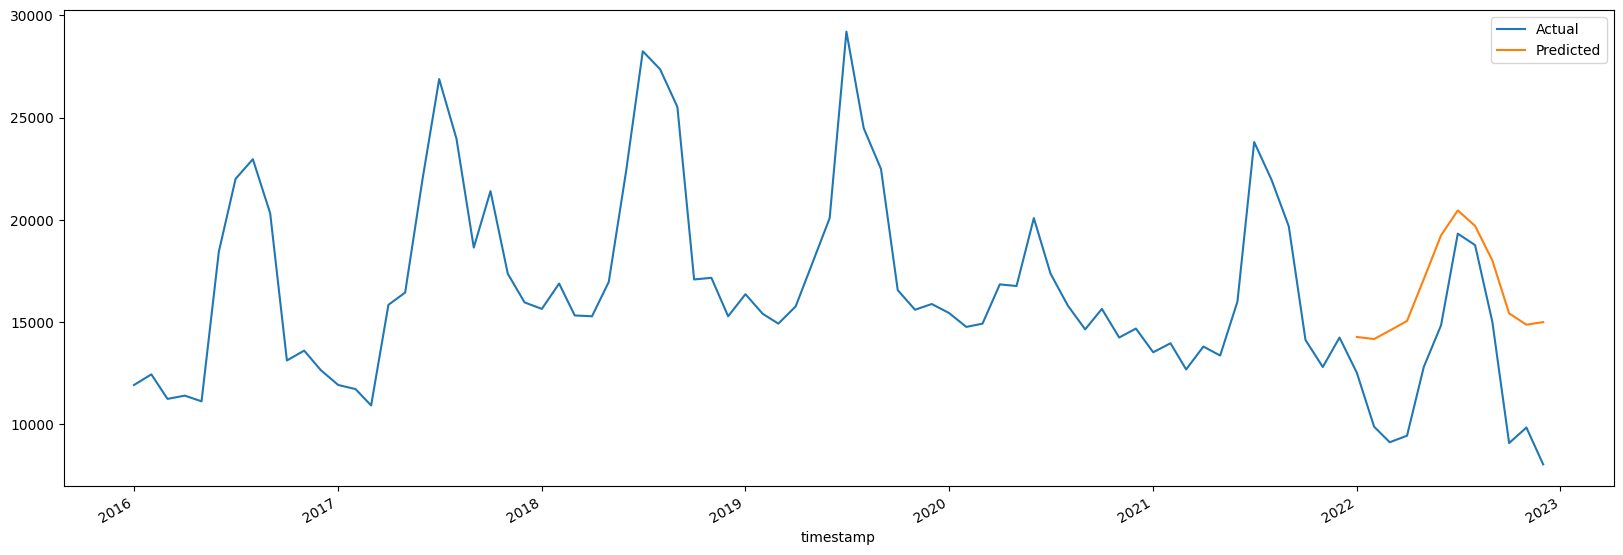

In [406]:
predicted_vs_actual_plus_training = pd.concat([ytrain_table, predicted_vs_actual], sort=True)
predicted_vs_actual_plus_training.plot(figsize=(20,7))

In [407]:
Baseline_Period = [2021,2022]
Baseline_Usage= ytrain_table[ytrain_table.index.year.isin(Baseline_Period)]

Text(0, 0.5, 'kWH')

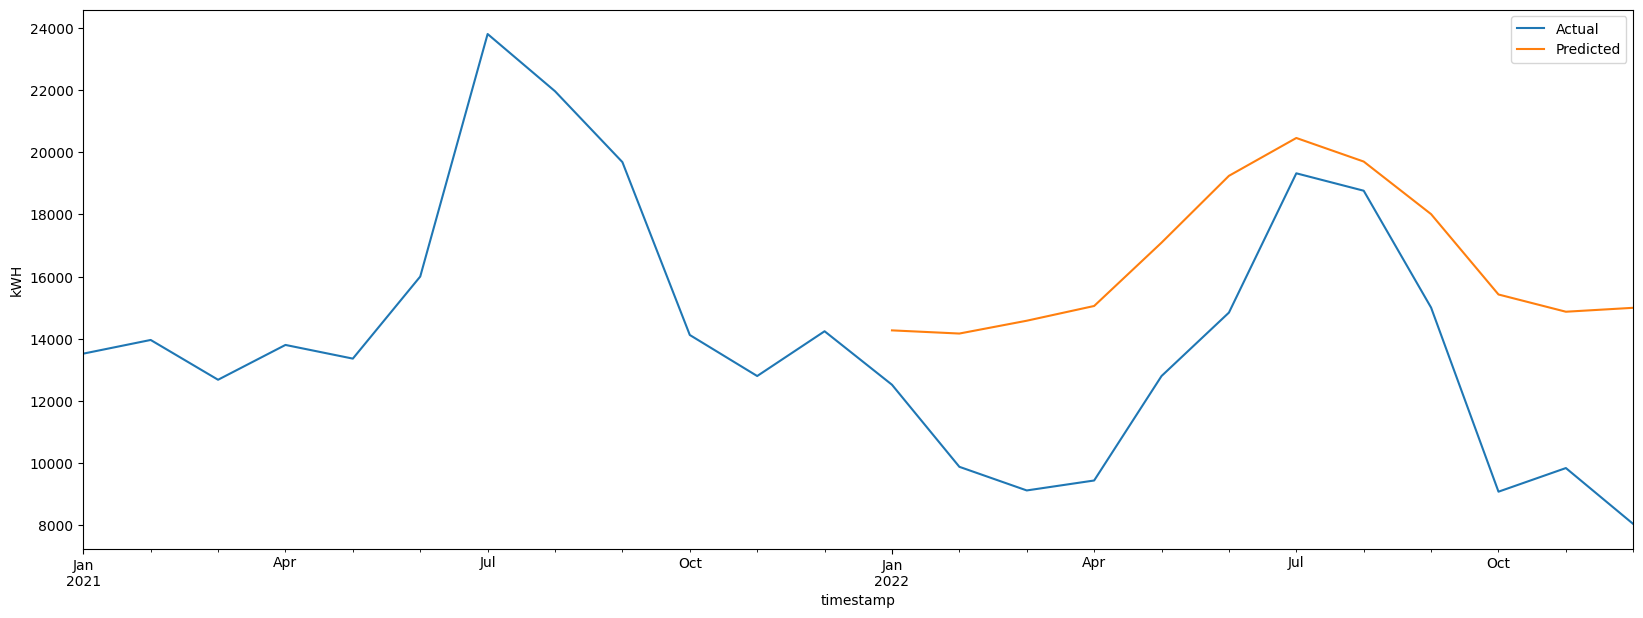

In [408]:
Baseline_Usage_vs_actual_plus_training = pd.concat([predicted_vs_actual, Baseline_Usage], sort=True)
Baseline_Usage_vs_actual_plus_training.plot(figsize=(20,7))
plt.ylabel("kWH")

In [409]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
cv_rmse = rmse / y_test.mean() * 100

print("MSE:", mse)
print("RMSE:", rmse)
print("Mean Absolute Error:", mae)
print('CV-RMSD:', cv_rmse)
print("R-squared:", r2)

MSE: 20463823.44
RMSE: 4523.69577226409
Mean Absolute Error: 4100.066666666667
CV-RMSD: 36.52068707425261
R-squared: -0.5002998651008812
